### **Objective**

To explore and visualize the final, cleaned Airbnb modeling dataset. This analysis will help us understand the distributions of the target variable and key features, identify outliers, and validate some of the assumptions made in our modeling strategy.

#### **1. Setup and Load Data**

First, we'll import the necessary libraries and load the final dataset created by the ETL notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
CITY = "nyc"
DATA_DIR = os.path.expanduser(f"../data")
DATASET_PATH = os.path.join(DATA_DIR, f"{CITY}_final_modeling_dataset.parquet")

# --- Plotting Style ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# --- Load Data ---
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"Final dataset not found at {DATASET_PATH}")

df = pd.read_parquet(DATASET_PATH)
print(f"Dataset loaded successfully with {len(df):,} records.")

# Display basic info and a sample
df.info()
display(df.head())

Dataset loaded successfully with 83,218 records.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83218 entries, 0 to 83217
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   83218 non-null  int64  
 1   year_month                   83218 non-null  object 
 2   target_price                 83218 non-null  float64
 3   estimated_occupancy_rate     83218 non-null  float64
 4   latitude                     83218 non-null  float64
 5   longitude                    83218 non-null  float64
 6   neighbourhood_cleansed       83218 non-null  object 
 7   property_type                83218 non-null  object 
 8   room_type                    83218 non-null  object 
 9   accommodates                 83218 non-null  int64  
 10  bedrooms                     83218 non-null  float64
 11  beds                         83218 non-null  float64
 12  bathrooms_numeric        

,listing_id,year_month,target_price,estimated_occupancy_rate,latitude,longitude,neighbourhood_cleansed,property_type,room_type,accommodates,...,review_scores_communication,review_scores_location,review_scores_value,number_of_reviews_ltm,host_is_superhost,host_response_rate,host_acceptance_rate,host_identity_verified,instant_bookable,month
0,32844072,2024-10,86.0,0.266667,40.764990,-73.879890,East Elmhurst,Entire rental unit,Entire home/apt,2,...,4.82,4.63,4.71,1,False,0.790000,0.810000,True,False,10
1,17093264,2024-10,56.0,0.200000,40.684110,-73.862280,Ozone Park,Private room in home,Private room,2,...,4.79,4.84,4.74,5,True,1.000000,1.000000,True,True,10
2,48846698,2024-10,60.0,0.133333,40.648410,-73.898840,Canarsie,Private room in townhouse,Private room,2,...,4.67,4.50,4.67,0,False,1.000000,0.000000,True,False,10
3,800784650035007772,2024-10,188.0,0.133333,40.609097,-74.159872,Bull's Head,Private room in rental unit,Private room,2,...,5.00,5.00,4.71,1,False,0.955687,0.863653,True,False,10
4,24181763,2024-10,102.0,1.000000,40.683260,-73.878020,Cypress Hills,Private room in home,Private room,2,...,4.95,4.72,4.86,67,True,1.000000,1.000000,False,True,10


#### **2. Target Variable Analysis: `target_price`**

This is the most important analysis, as it directly relates to the exploding loss issue. We expect to see a highly skewed distribution.

--- Target Variable Analysis: target_price ---

Descriptive Statistics for Price:


count    83218.000000
mean       206.663522
std        836.430640
min          3.000000
25%         93.000000
50%        143.000000
75%        225.000000
90%        355.000000
95%        495.000000
99%        964.830000
max      50052.000000
Name: target_price, dtype: float64

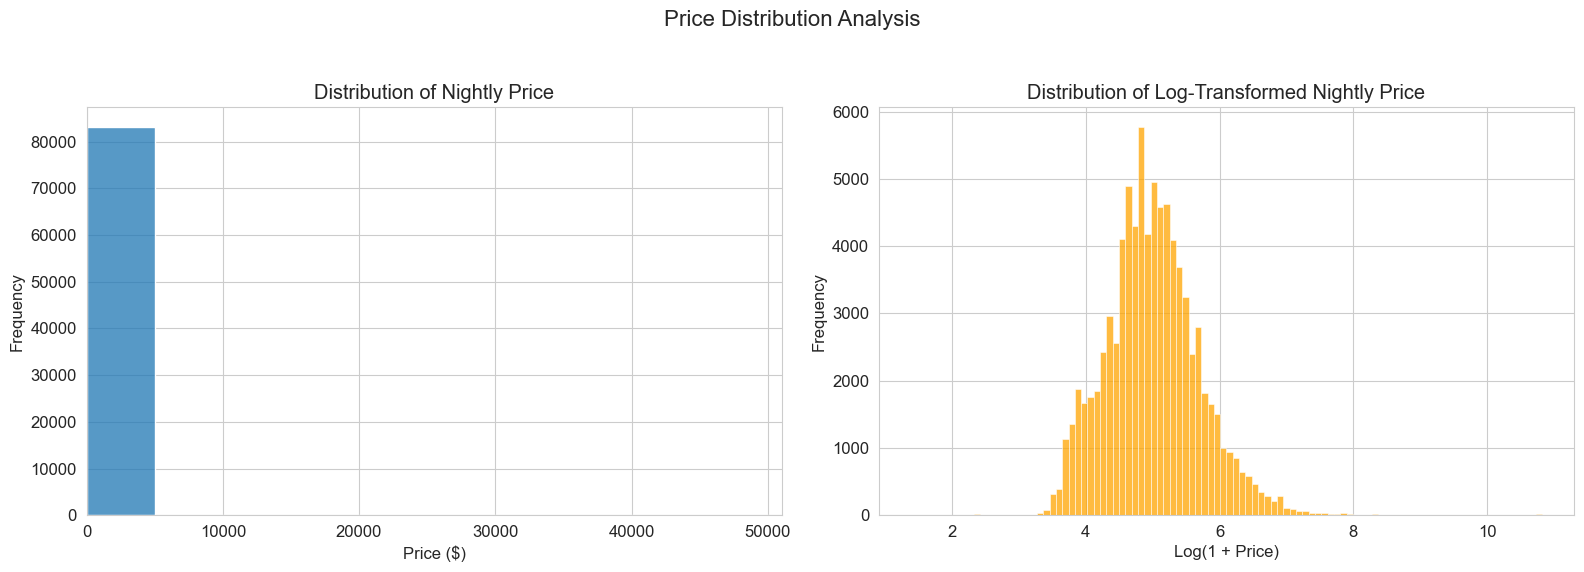

In [3]:
print("--- Target Variable Analysis: target_price ---")
print("\nDescriptive Statistics for Price:")
display(df['target_price'].describe(percentiles=[.25, .5, .75, .9, .95, .99]))

# --- Visualize the distribution ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of the raw price
sns.histplot(df['target_price'], bins=10, ax=axes[0])
axes[0].set_title('Distribution of Nightly Price')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 51000) # Zoom in on the bulk of the distribution

# Histogram of the log-transformed price
sns.histplot(np.log1p(df['target_price']), bins=100, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Log-Transformed Nightly Price')
axes[1].set_xlabel('Log(1 + Price)')
axes[1].set_ylabel('Frequency')

plt.suptitle('Price Distribution Analysis', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [4]:
check = df['target_price'].sort_values(ascending=False).head(50)
check

82160    50052.0
76466    50000.0
83198    50000.0
75792    50000.0
81606    50000.0
74875    50000.0
76830    50000.0
75642    50000.0
76467    50000.0
76465    50000.0
69886    50000.0
82159    50000.0
69248    50000.0
76445    50000.0
75999    50000.0
75790    50000.0
81755    50000.0
76321    50000.0
76096    50000.0
83197    50000.0
68010    40029.0
77589    40000.0
76136    40000.0
12138    10000.0
19997    10000.0
1312      9994.0
19278     9994.0
3473      7500.0
15305     7500.0
2837      5000.0
2835      5000.0
2836      5000.0
57324     5000.0
62309     4816.0
23442     4645.0
38748     4503.0
32289     4503.0
24389     4503.0
50724     4435.0
50349     4229.0
61910     4206.0
31773     4199.0
61909     4195.0
31750     4185.0
38330     4129.0
31772     4129.0
23441     4129.0
38329     4129.0
4770      4000.0
17210     4000.0
Name: target_price, dtype: float64

Original dataset: 83218 records
Filtered dataset: 78327 records
Lower bound: $37.00, Upper bound: $495.00


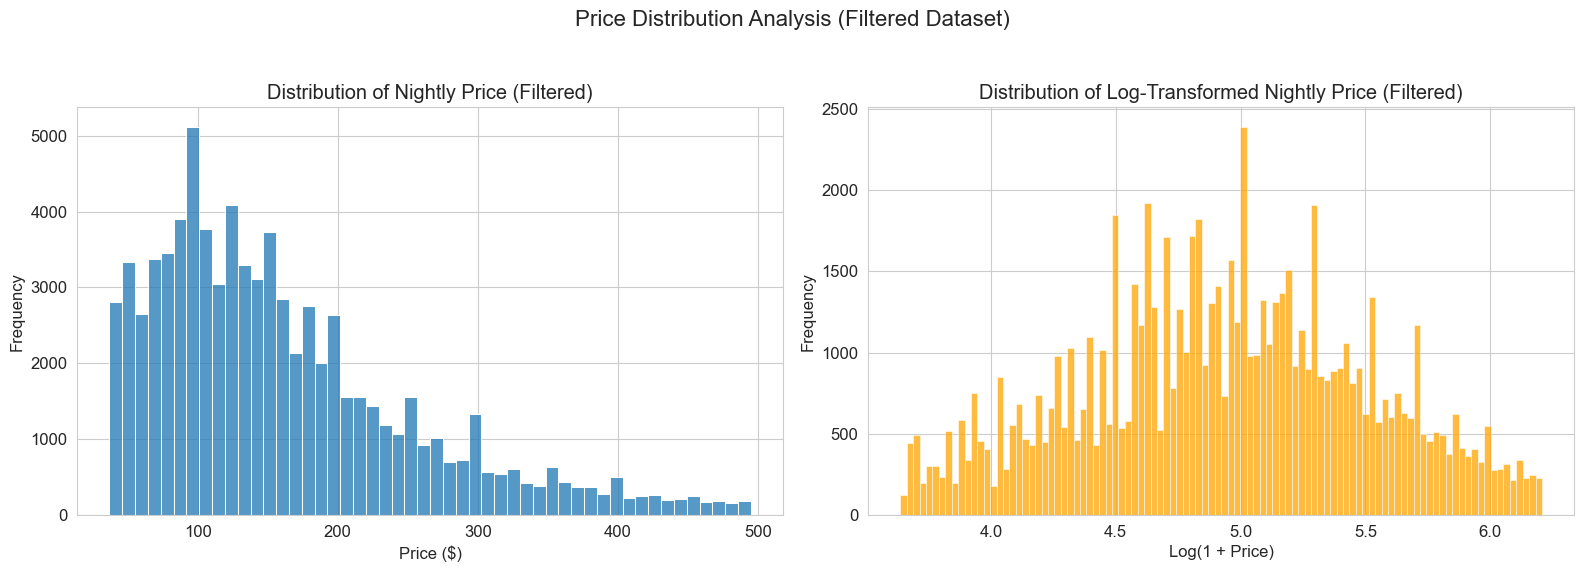

In [11]:
# Remove top and bottom 1% of samples by target_price
lower_bound = df['target_price'].quantile(0.01)
upper_bound = df['target_price'].quantile(0.95)
df_filtered = df[(df['target_price'] >= lower_bound) & (df['target_price'] <= upper_bound)]
print(f"Original dataset: {len(df)} records")
print(f"Filtered dataset: {len(df_filtered)} records")
print(f"Lower bound: ${lower_bound:.2f}, Upper bound: ${upper_bound:.2f}")

# Plot histograms of target_price and log target_price after filtering
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of the filtered price
sns.histplot(df_filtered['target_price'], bins=50, ax=axes[0])
axes[0].set_title('Distribution of Nightly Price (Filtered)')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

# Histogram of the log-transformed filtered price
sns.histplot(np.log1p(df_filtered['target_price']), bins=100, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Log-Transformed Nightly Price (Filtered)')
axes[1].set_xlabel('Log(1 + Price)')
axes[1].set_ylabel('Frequency')

plt.suptitle('Price Distribution Analysis (Filtered Dataset)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
df = df_filtered.copy()

In [14]:
df['bedrooms'].value_counts().sort_index()

bedrooms
0.0     8962
1.0    51673
2.0    12748
3.0     3898
4.0      756
5.0      249
6.0       37
7.0        3
9.0        1
Name: count, dtype: int64

In [6]:
df['beds'].value_counts().sort_index()

beds
0.0      1649
1.0     47090
2.0     20549
3.0      7771
4.0      3682
5.0      1282
6.0       650
7.0       244
8.0       165
9.0        60
10.0       16
11.0       13
12.0       25
13.0        4
14.0        2
16.0        2
19.0       10
21.0        2
42.0        2
Name: count, dtype: int64

In [15]:
df['property_type'].value_counts().sort_index()

property_type
Barn                                      5
Boat                                      4
Camper/RV                                 6
Casa particular                           6
Entire bungalow                          56
Entire condo                           2421
Entire cottage                            4
Entire guest suite                     1798
Entire guesthouse                       143
Entire home                            3785
Entire loft                            1082
Entire place                            141
Entire rental unit                    30477
Entire serviced apartment               456
Entire townhouse                       1261
Entire vacation home                     59
Entire villa                             13
Houseboat                                 1
Private room                            104
Private room in bed and breakfast       207
Private room in bungalow                 26
Private room in camper/rv                 2
Private room in ca

In [28]:
df['estimated_occupancy_rate'].value_counts().sort_index()

estimated_occupancy_rate
0.066667    30231
0.133333    15429
0.200000     5427
0.266667     3172
0.333333     2807
0.400000     2495
0.466667     2419
0.533333     2298
0.600000     2016
0.666667     1820
0.733333     1688
0.800000     1432
0.866667     1202
0.933333      982
1.000000     4909
Name: count, dtype: int64

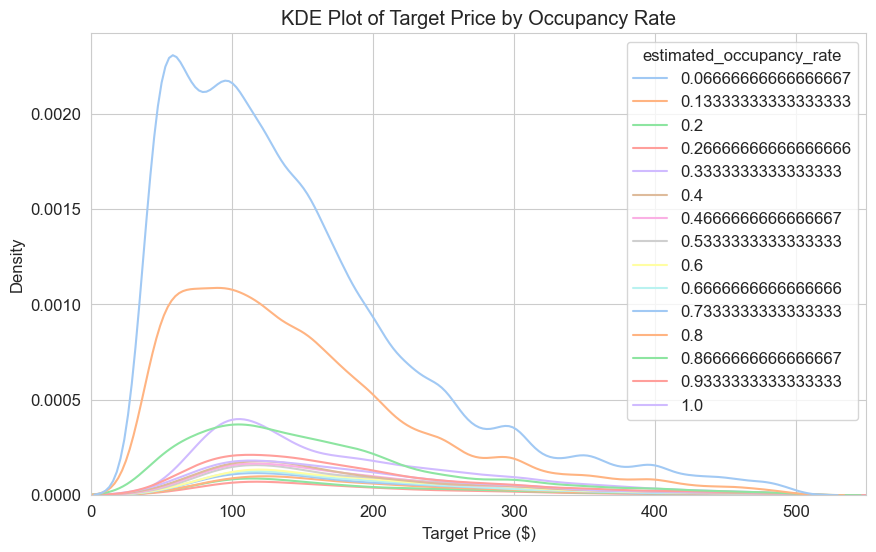

In [27]:
# set pastel palette

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='target_price', hue='estimated_occupancy_rate', fill=False, alpha=1.0, palette='pastel')
plt.title('KDE Plot of Target Price by Occupancy Rate')
plt.xlabel('Target Price ($)')
plt.ylabel('Density')
plt.xlim(0, 550)  # Adjust as needed
plt.show()

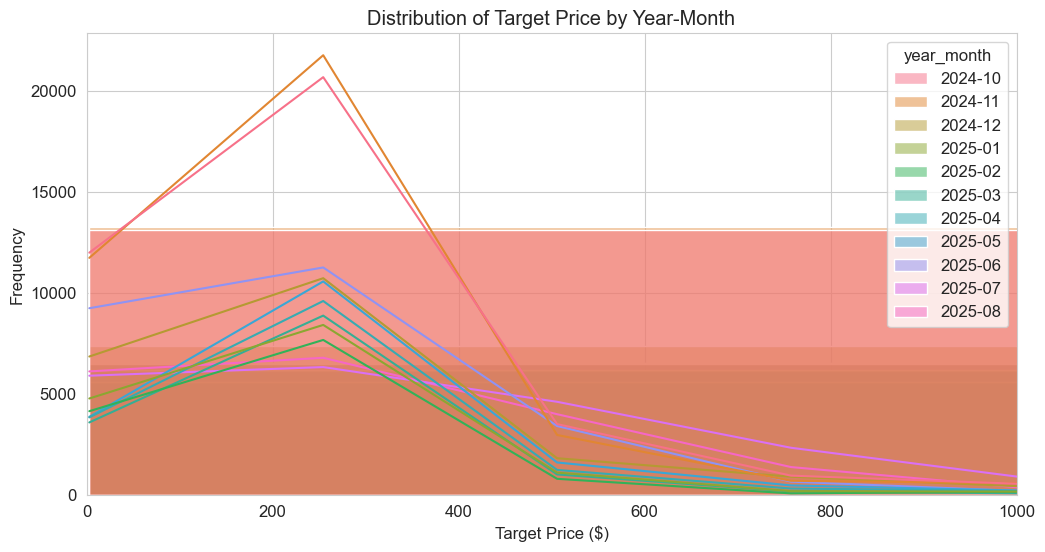

In [9]:
# Histogram (with kde) of target price, with hue=year_month
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='target_price', hue='year_month', kde=True, bins=50)
plt.title('Distribution of Target Price by Year-Month')
plt.xlabel('Target Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Adjust as needed
plt.show()

In [ ]:
# Histogram (with kde) of target price, with hue=bedrooms
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='target_price', hue='bedrooms', kde=True, bins=50)
plt.title('Distribution of Target Price by Bedrooms')
plt.xlabel('Target Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Adjust as needed
plt.show()

In [ ]:
# Histogram (with kde) of target price, with hue=beds
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='target_price', hue='beds', kde=True, bins=50)
plt.title('Distribution of Target Price by Beds')
plt.xlabel('Target Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Adjust as needed
plt.show()

In [ ]:
# Histogram (with kde) of target price, with hue=accommodates
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='target_price', hue='accommodates', kde=True, bins=50)
plt.title('Distribution of Target Price by Accommodates')
plt.xlabel('Target Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Adjust as needed
plt.show()

In [ ]:
# Correlation heatmap of numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
# Boxplot of target_price by room_type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='room_type', y='target_price')
plt.title('Target Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Target Price ($)')
plt.ylim(0, 1000)  # Adjust as needed
plt.show()

In [ ]:
# Scatterplot of target_price vs review_scores_rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_scores_rating', y='target_price', alpha=0.5)
plt.title('Target Price vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Target Price ($)')
plt.show()